<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 1st exercise: <font color="#C70039">Work with standard deviations for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date: 29.11.2022
* editor: Tobias Vincent Esser
* matriculation number: 11134729

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for getting into standard deviations as a common technique to detect anomalies when the data is normally distributed. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. go and find three different data sets on the web 
    * kaggle.com might be a good source (they also offer an API for data download)
    * make sure two of the three data sets are normally distributed
    * download one data set that is not normally distributed
5. visualize the data
6. compute the anomalies
7. visualize the anomalies
8. does the 0,3% rule apply?
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
10. which statement can be made and which cannot? 
-----------------------------------------------------------------------------------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy.random import randn
np.random.seed(1)

In [6]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    #define a list to accumulate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    print("lower limit=", round(lower_limit,8))
    print("upper limit=", round(upper_limit,8))
    
    # Generate outliers list
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    
    return anomalies

In [3]:
# multiply and add by random numbers to get some real values
# randn generates samples from the normal distribution (important - see below)
data = np.random.randn(50000)  * 20 + 20

lower limit= -39.96482266
upper limit= 80.11636225


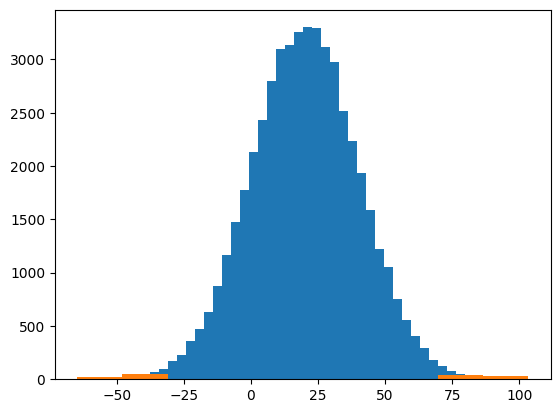

In [4]:
anomalies = find_anomalies(data)
plt.hist(data,bins = 50)
plt.hist(anomalies)
plt.show()

## Loans Income
The dataset is downloaded from Kaggle

lower limit= -29854.60150356
upper limit= 167375.63838356


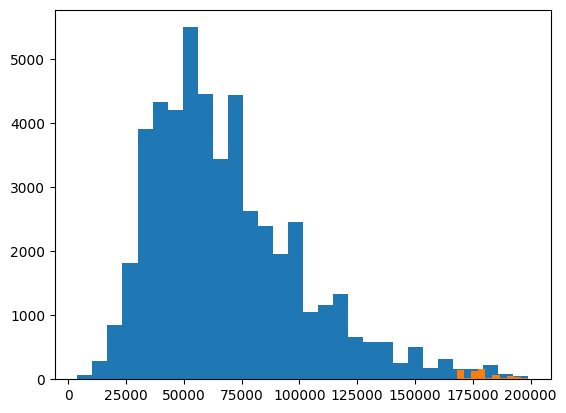

In [7]:
df1 = pd.read_csv('data/loans_income.csv')
data1 = df1['x'].to_numpy()
anomalies1 = find_anomalies(data1)
plt.hist(data1, bins=30)
plt.hist(anomalies1)
plt.show()

The histogram describes a dataset which appears to be not normal distributed.<br>
This shows, that the outliers are only in the high end of the spectrum and therefore, the dataset is definitely not normal distributed.

In [8]:
print(len(data1))

50000


## SOCR Height Weight

The dataset is downloaded from Kaggle

lower limit= 62.28819139
upper limit= 73.69803581


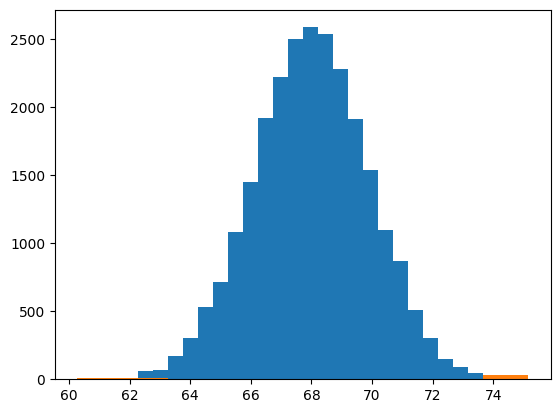

In [6]:
df2 = pd.read_csv('data/SOCR-HeightWeight.csv')
data2 = df2['Height(Inches)'].to_numpy()
anomalies2 = find_anomalies(data2)
plt.hist(data2, bins=30)
plt.hist(anomalies2)
plt.show()

The histogram describes a dataset which appears to be close to normal distributed.<br>
This shows, that the outliers are both on the high and on the low end, which means, it could be normal distributed.

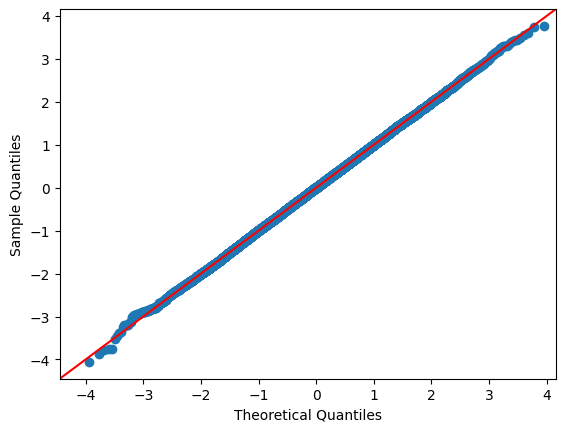

In [7]:
import statsmodels.api as sm

#create Q-Q plot with 45-degree line added to plot
normalized_data2 = (data2-data2.mean())/data2.std()
fig = sm.qqplot(normalized_data2,line='45')
plt.show()

This shows that, the data is very close to be normaly distributed. We can prove that the data is normal deviated by performing the shapiro-wilk test. If alpha > 0.05, then we can assume, the data is normally distributed.

In [8]:
from scipy import stats


shapiro_test = stats.shapiro(data2)
print(shapiro_test)

ShapiroResult(statistic=0.9999220371246338, pvalue=0.6875156164169312)


/home/estrixds/.local/share/virtualenvs/AML-LDdrvOOY/lib64/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since the pvalue is way greater than the significance lvl of 0.05, we can safely assume that the data is normal distributed.

## students by fu-berlin

lower limit= 139.89699788
upper limit= 187.40957146


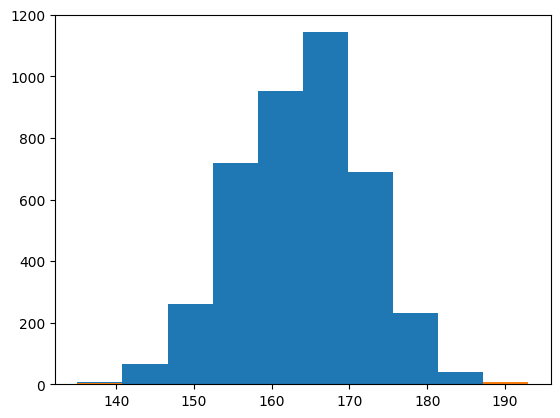

In [38]:
df3 = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")
data3 = df3[df3['gender'] == 'Female']["height"].to_numpy()
anomalies3 = find_anomalies(data3)
plt.hist(data3)
plt.hist(anomalies3)
plt.show()

The histogram describes a dataset which appears to be not normal distributed, but close to it.<br>
That the outliers are both on the high and on the low end, means, it could be normal distributed.

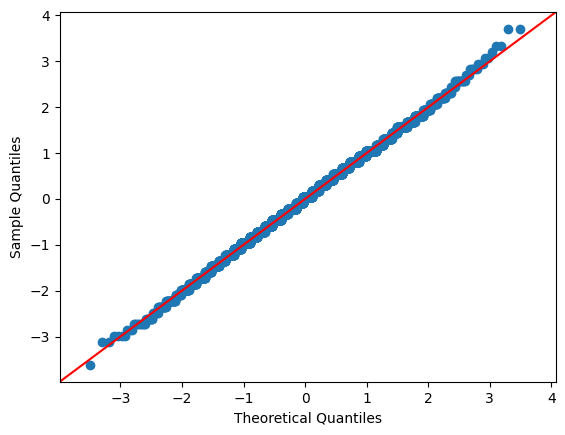

In [39]:
import statsmodels.api as sm

#create Q-Q plot with 45-degree line added to plot
normalized_data3 = (data3-data3.mean())/data3.std()
fig = sm.qqplot(normalized_data3,line='45')
plt.show()

since the data is very close on the line, we can still assume, that the data is normal distributed.

In [40]:
from scipy import stats


shapiro_test = stats.shapiro(data3)
print(shapiro_test)

ShapiroResult(statistic=0.9982568025588989, pvalue=0.00016429532843176275)


since the p-value is smaller than significance niveau 0.05, we have to deny the null-hypothesis, meaning the data is not normal distributed.